# Detrended White Light Curves

Each night uses the following files:

```
data
├── transit_N_detrended_lc.dat
└── transit_N_params.dat
```

for data taken on night `N`.

## Data summary

Below are the column names associated to each data file:

* `transit_N_detrended_lc.dat`
    * Time: transit times (JD)
    * DetFlux: detrended normalized flux
    * DetFluxErr: +/- $1\sigma$ uncertainty on `DetFlux`


* `transit_N_params.dat`
    * Each row reports the median (`Value`), and 68% credibility (`SigmaUp`, `SigmaDown`) of parameter `Variable`

## Plotting routine

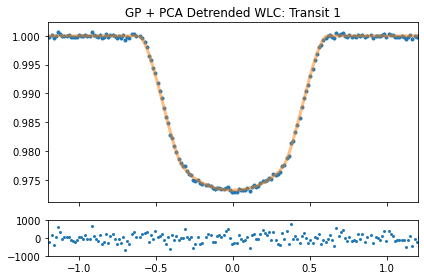

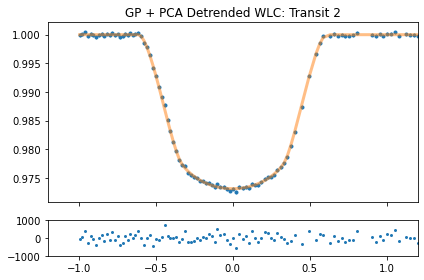

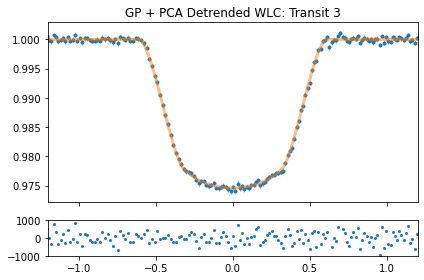

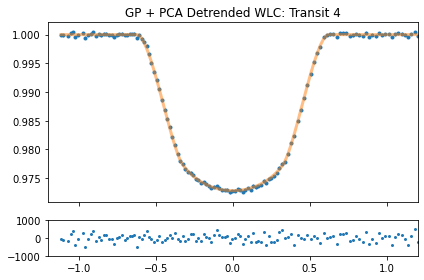

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

transits = [1, 2, 3, 4] # Nights

for t_n in transits:
    # GPTS Detrended WLC data
    gpts_data = pd.read_table(
        f"data/transit_{t_n}_detrended_lc.dat",
        sep="\s+",
        escapechar='#',
    )

    # GPTS WLC summary params
    gpts_params = pd.read_table(
        f"data/transit_{t_n}_params.dat",
        sep="\s+",
        escapechar='#',
        index_col=" Variable"
    )

    # Unpack data
    t_data, f_data, f_err_data, f_model_data = gpts_data.values.T
    t0 = gpts_params.loc["t0"]["Value"]
   
    ######
    # Plot
    ######
    fig, axes = plt.subplots(
        2, 1,
        sharex=True,
        gridspec_kw={'height_ratios':[5, 1]}
    )
    ax_top, ax_bottom = axes

    # Common variables
    t_rel_data = (t_data - t0) * 24.0

    # Data 
    ax_top.errorbar(
        t_rel_data,
        f_data,
        yerr=f_err_data,
        fmt='.',
        lw=0.5,
        zorder=1,
    )

    # Model
    ax_top.plot(
        t_rel_data,
        f_model_data,
        lw=3,
        alpha=0.5,
    )

    # Residuals
    resids_data = f_data - f_model_data
    ax_bottom.plot(t_rel_data, resids_data * 1e6, '.', mew=0)

    # Scaling
    ax_top.set_title(f"GP + PCA Detrended WLC: Transit {t_n}")
    ax_bottom.set_xlim(-1.2, 1.2)
    ax_bottom.set_ylim(-1_000, 1_000)
    
    fig.tight_layout()